In [1]:
# Import libraries to be used in the task
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt

from sklearn import metrics     
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

# Ignore warnings - warning were used in the development of the notebook, and removed in the final version
import warnings
#warnings.filterwarnings('ignore')

In [2]:
unfinished_construction_population_df = pd.read_csv('unfinished_construction_population_df.csv')
unfinished_construction_population_df.info()
unfinished_construction_population_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   420 non-null    int64  
 1   Department Ref Number        420 non-null    float64
 2   Construction Activity (Y/N)  420 non-null    object 
 3   County                       420 non-null    object 
 4   Detached Units               420 non-null    float64
 5   Semi-detached Units          420 non-null    float64
 6   Terraced Units               420 non-null    float64
 7   Apartment Units              420 non-null    float64
 8   Duplex Units                 420 non-null    float64
 9   Total All Units              420 non-null    float64
 10  Occupied Houses              420 non-null    float64
 11  Vacant Houses                420 non-null    float64
 12  No Start Houses              420 non-null    float64
 13  Occupied Apartments 

(420, 18)

# Last resort....

In [3]:
ml_df = unfinished_construction_population_df
ml_df['Occupied Houses']=unfinished_construction_population_df['Occupied Houses'].apply(lambda x: 1 if x != 0 else 0)

ml_df = ml_df.replace('Yes', 1)
ml_df = ml_df.replace('No', 0)


In [4]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   420 non-null    int64  
 1   Department Ref Number        420 non-null    float64
 2   Construction Activity (Y/N)  420 non-null    int64  
 3   County                       420 non-null    object 
 4   Detached Units               420 non-null    float64
 5   Semi-detached Units          420 non-null    float64
 6   Terraced Units               420 non-null    float64
 7   Apartment Units              420 non-null    float64
 8   Duplex Units                 420 non-null    float64
 9   Total All Units              420 non-null    float64
 10  Occupied Houses              420 non-null    int64  
 11  Vacant Houses                420 non-null    float64
 12  No Start Houses              420 non-null    float64
 13  Occupied Apartments 

## Decision Tree


In [5]:
# Use only 'Age: 2' and 'EstimatedSalary: 3' features into X
X = ml_df.iloc[:, [1, 15]].values

# Store the 'Purchased' feature into 'y'
y = ml_df.iloc[:, 9].values

# Display X and y 
#X, y

In [6]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420, 2), (420,), (315, 2), (105, 2), (315,), (105,))

In [7]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
# X_train, X_test

In [8]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

NameError: name 'classification_report' is not defined

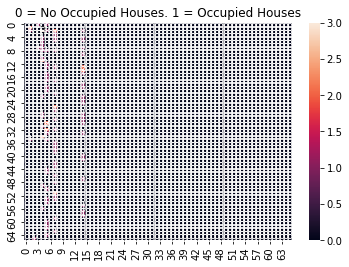

In [10]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.title("0 = No Occupied Houses. 1 = Occupied Houses")
plt.savefig("confusion_matrix", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

## Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred2=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))